Seoul Bike Rentals Forecasting Project - Connor Martins

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Prepare data for basic visualizations:

In [16]:
path = os.path.join('c:' + os.sep, 'Users', 'cmart', 'PycharmProjects', 'streamlit_stuff', 'time series', 'seoul_forecasting', 'SeoulBikeData.csv')
# Main dataframe:
df = pd.read_csv(path, encoding='ISO-8859-1')
print(f'Main Dataframe: \n{df.head()}\n')
# Time series dataframe:
ts_df = df.loc[:, ('Date', 'Hour', 'Rented Bike Count')]
ts_df['DateTime'] = pd.to_datetime(ts_df['Date'] + ' ' + ts_df['Hour'].astype(str), format='%d/%m/%Y %H')
# Make hour, weekday, and month columns:
ts_df['Hour'] = ts_df['DateTime'].dt.hour
ts_df['DayOfWeek'] = ts_df['DateTime'].dt.dayofweek
ts_df['Month'] = ts_df['DateTime'].dt.month
# Make a morning vs. afternoon column using list comprehension:
ts_df['DayPart'] = ['Morning' if i < 11 else 'Afternoon' for i in ts_df['Hour']]
print(f'Time Series Dataframe: \n{ts_df.head()}')


Main Dataframe: 
         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winte

Make time series plots of bike rentals using seaborn:

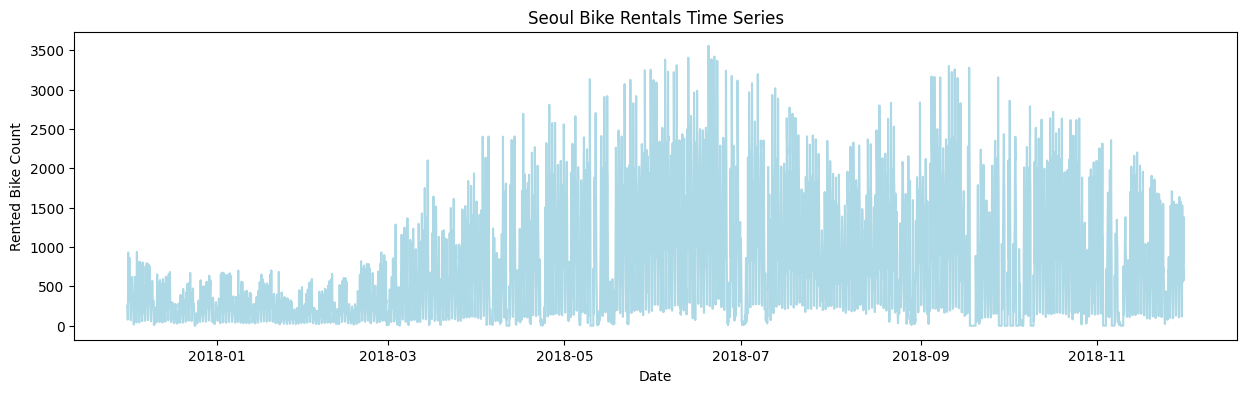

In [17]:

plt.figure(figsize=(15, 4), dpi=100)
sns.lineplot(x=ts_df['DateTime'], y=ts_df['Rented Bike Count'], color='lightblue')
plt.gca().set(title='Seoul Bike Rentals Time Series', xlabel='Date', ylabel='Rented Bike Count')
plt.show()


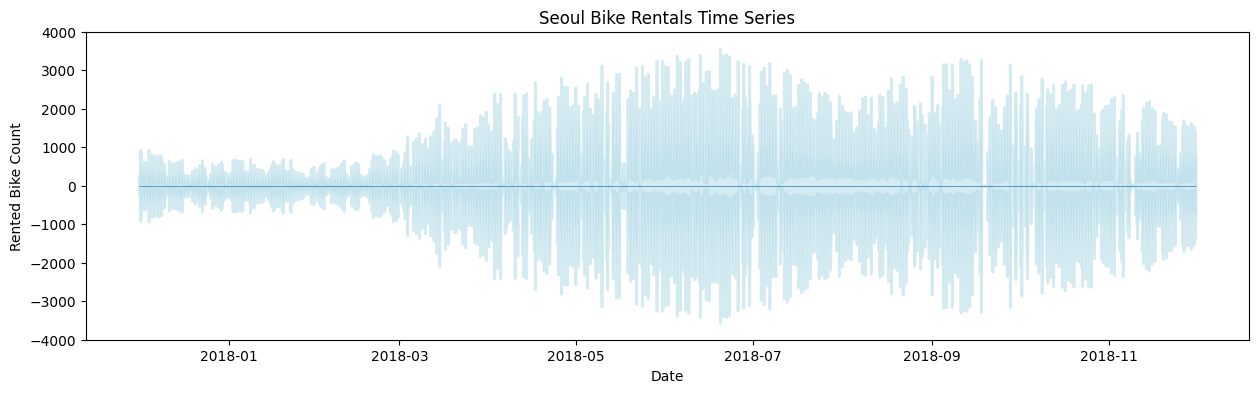

In [18]:
plt.figure(figsize=(15, 4), dpi=100)
plt.fill_between(x=ts_df['DateTime'], y1=ts_df['Rented Bike Count'], y2=-ts_df['Rented Bike Count'], alpha=0.5, linewidth=2, color='lightblue')
plt.ylim(-4000, 4000)
plt.hlines(y=0, xmin=np.min(ts_df['DateTime']), xmax=np.max(ts_df['DateTime']), linewidth=0.5)
plt.gca().set(title='Seoul Bike Rentals Time Series', xlabel='Date', ylabel='Rented Bike Count')
plt.show()

Understand the distribution of hourly, daily, and monthly rental bike counts:

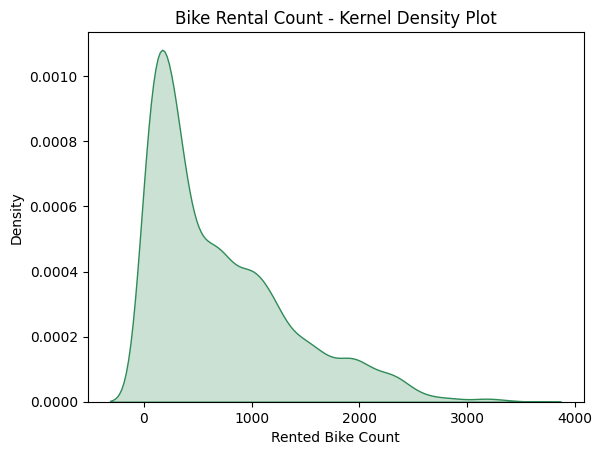

In [19]:
sns.kdeplot(x=df['Rented Bike Count'], fill=True, color='seagreen')
plt.title('Bike Rental Count - Kernel Density Plot')
plt.show()

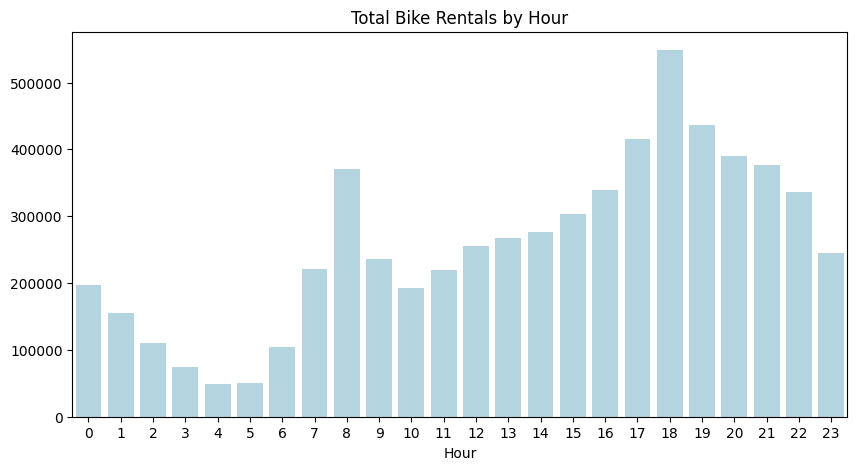

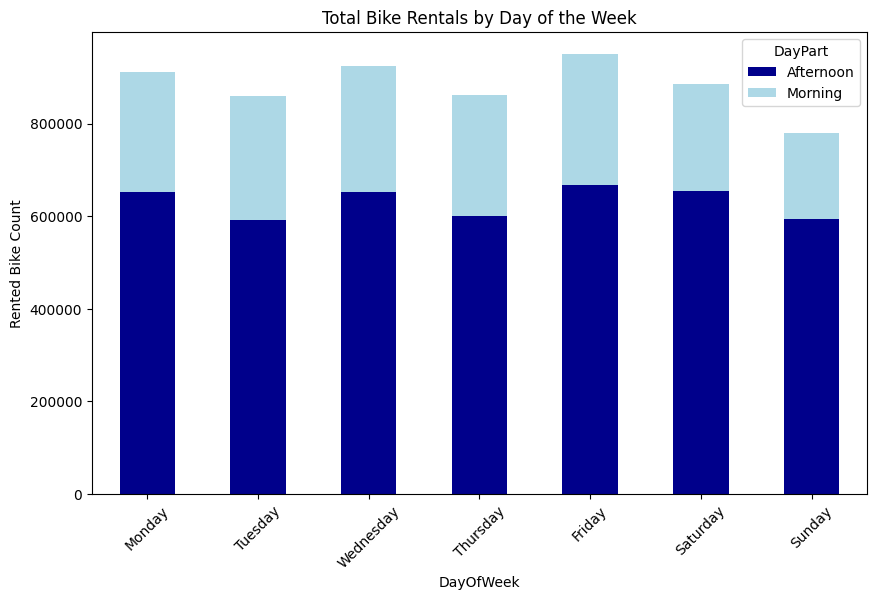

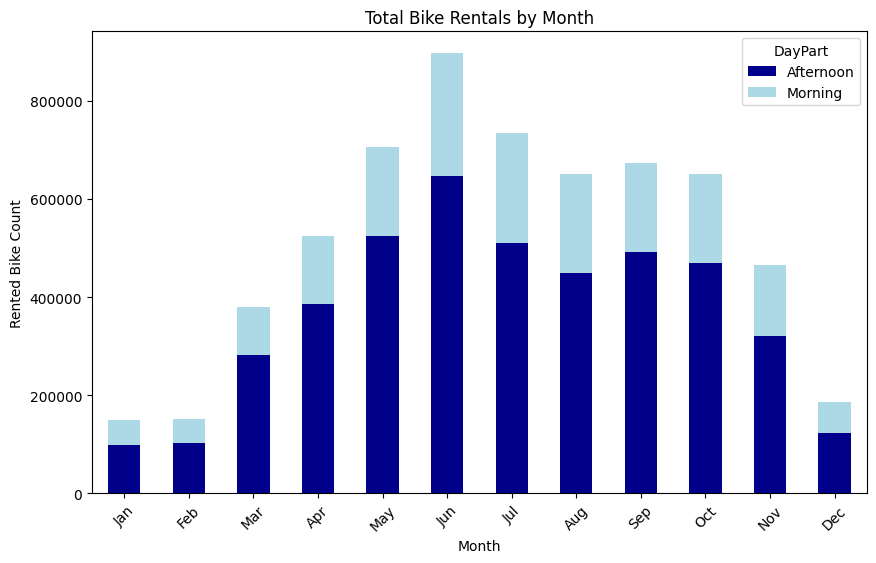

In [23]:
def bar_charts(dataframe):
    # Sum counts by hour:
    hourly_counts = dataframe.groupby(['Hour'])['Rented Bike Count'].sum()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='lightblue')
    plt.xticks(range(24))
    plt.title('Total Bike Rentals by Hour')
    plt.show()
    # Sum counts by day of the week:
    daily_counts = dataframe.groupby(['DayOfWeek', 'DayPart'])['Rented Bike Count'].sum().unstack()
    # Prepare daily grouping for stacked bar chart:
    colors = ['darkblue', 'lightblue']
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, ylabel='Rented Bike Count')
    plt.xticks(range(7), day_names, rotation=45)
    plt.title('Total Bike Rentals by Day of the Week')
    plt.show()
    # Sum counts by month:
    monthly_counts = dataframe.groupby(['Month', 'DayPart'])['Rented Bike Count'].sum().unstack()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthly_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, ylabel='Rented Bike Count')
    plt.xticks(range(12), month_names, rotation=45)
    plt.title('Total Bike Rentals by Month')
    plt.show()

bar_charts(ts_df)

Generate a scatterplot of some variable of interest against bike rental counts for potential VAR Modeling considerations:

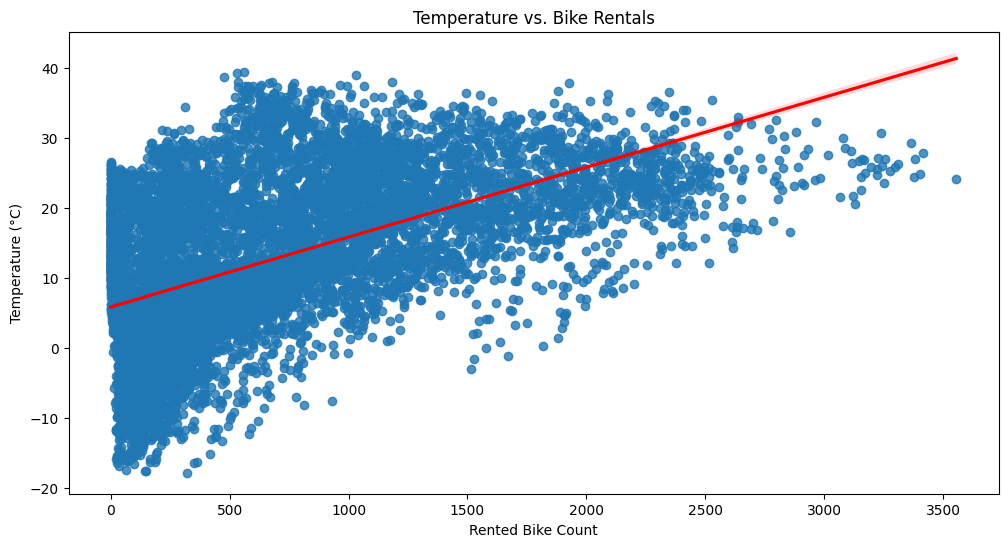

In [39]:
def scatterplots(dataframe, y_var):
    plt.figure(figsize=(12, 6))
    sns.regplot(data=dataframe, x=dataframe['Rented Bike Count'], y=dataframe[y_var], marker='o', line_kws={'color': 'red'})
    plt.xlabel('Rented Bike Count')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature vs. Bike Rentals')
    plt.show()
scatterplots(df, y_var='Temperature(°C)')